# Human Activity Recognition Python Notebook

## Background of the data set
Abstract: The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


In [137]:
#import relevant libaries
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#to show the visualisation in workbook
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### 1) Import Training and Test Data

In [50]:
#training data set
X_train = pd.read_csv(r'C:\Users\do_du\Downloads\Machine Learning Project\1 Human Activity Recognition\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt',header=None,delim_whitespace=True)
y_train = pd.read_csv(r'C:\Users\do_du\Downloads\Machine Learning Project\1 Human Activity Recognition\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt',header=None,delim_whitespace=True)

#test data
X_test = pd.read_csv(r'C:\Users\do_du\Downloads\Machine Learning Project\1 Human Activity Recognition\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt',header=None,delim_whitespace=True)
y_test = pd.read_csv(r'C:\Users\do_du\Downloads\Machine Learning Project\1 Human Activity Recognition\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt',header=None,delim_whitespace=True)




In [104]:
#import features names
columns_name = pd.read_table(r'C:\Users\do_du\Downloads\Machine Learning Project\1 Human Activity Recognition\UCI HAR Dataset\UCI HAR Dataset\features.txt',header=None, delimiter='\s+')
columns_list = columns_name[1].tolist()

X_train.columns = columns_list
X_test.columns = columns_list

y_train.columns = ['Activity Label']
y_test.columns = ['Activity Label']

#merge X_train and y_train, X_test and y_test
#train is X_train merged with y_train
train = pd.merge(X_train, y_train, left_on=X_train.index, right_on=y_train.index).drop(columns=['key_0'])
#test is a df created by merging X_test with y_test
test = pd.merge(X_test, y_test, left_on=X_test.index, right_on=y_test.index).drop(columns=['key_0'])

In [87]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [88]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [92]:
#see the range value of X_train
print(sum(X_train.describe().loc['max']>1))
print(sum(X_train.describe().loc['min']<-1))

0
0


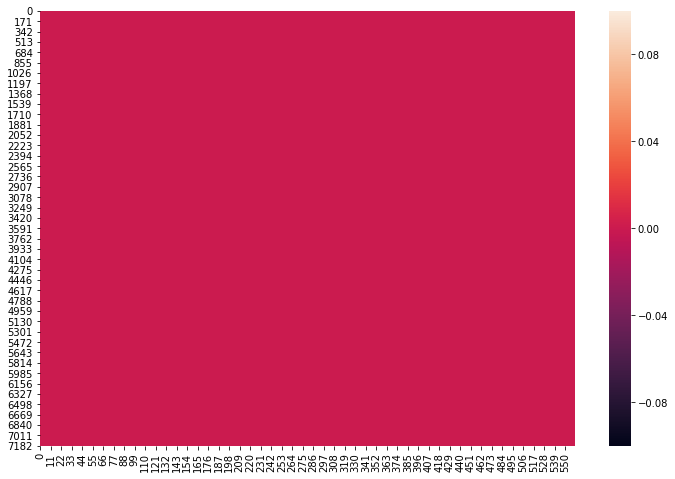

In [60]:
#checking for any null value

plt.figure(figsize=(12,8))
sns.heatmap(X_train.isnull())

Noticed that the dataset does not have any null values so no imputation or cleaning is required at this point.
Also, the data range is within [-1,1] range so no need to perform feature scaling or mean normalisation.

### 2) Visualise the target set

Target label (activity label) are given as below - need to check for data set skewness:

1 WALKING

2 WALKING_UPSTAIRS

3 WALKING_DOWNSTAIRS

4 SITTING

5 STANDING

6 LAYING


Text(0.5, 1.0, 'Activity Label Counts')

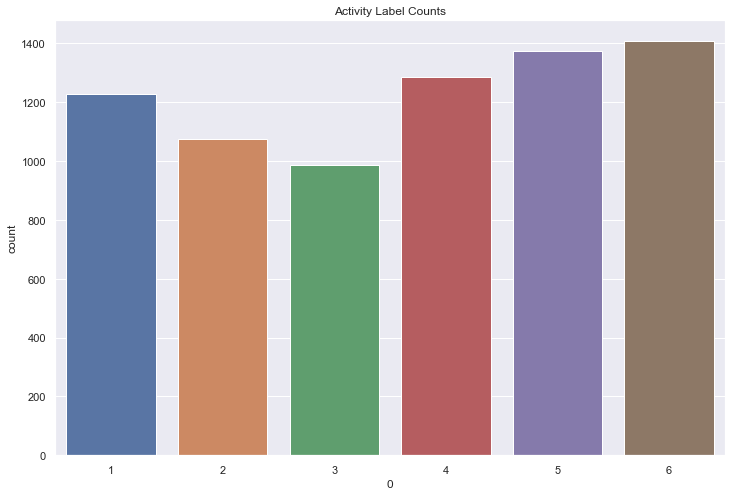

In [72]:
plt.figure(figsize=(12,8))
sns.set(style = 'darkgrid')
sns.countplot(y_train[0])
plt.title('Activity Label Counts')

Activity labels are distributed almost equally - more likely to be 4 (sitting), 5(standing) and 6 (laying).
I would have expected the data set skewed more toward those sedentary activitities but maybe the data set is too small (30 participants). Interesting to observe it with a larger population.

#### Using t-SNE to visualise the data set
As the data set has many similar features, let's plot the activity to understand whether the activity is separable.

In [ ]:
from sklearn.manifold import tsne

In [ ]:
all_data = 

### 3) Building Model

Since there is no obvious indicator of what variables can be used to predict activity label directly, let use all columns in the train data set to fit a model for y (greedy method).

I start by using the RandomForest model to predict activity label.

#### 3.1) Random Forest

In [138]:
#train & validation set split, using X_train & y train dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train_sklearn, X_val_sklearn, y_train_sklearn, y_val_sklearn = train_test_split(X_train, y_train, test_size = 0.3)

##### Fit model and tuning hyper-parameters:

Using GridSearch to tune the hyper-parameters because the data set is relatively small.

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

#pass in parameters for gridsearch
param_grid = {
    'n_estimators':[5,10,15,20,25,50,100,200]
    ,'max_features':['auto','sqrt','log2']
    ,'max_depth':[2,3,4,5]
}
rfc_CV = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_CV.fit(X_train_sklearn, y_train_sklearn)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [141]:
#Find the best set of parameters for this data set
rfc_CV.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}

In [143]:
#Fit the parameters to final models
rfc_best = RandomForestClassifier(random_state=42, max_features = 'auto', n_estimators = 50, max_depth = 5)
rfc_best.fit(X_train, y_train)

#Make predictions
rfc_pred = rfc_best.predict(X_test)

In [144]:
print('Accuracy of Random Forest: ', accuracy_score(y_test,rfc_pred))

Accuracy of Random Forest:  0.8866644044791313


On test set data the accuracy score is about 88.67%. 
Let's try another model to compare performance.

#### 3.2) Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [150]:
lr_parameters = {
    'C': np.arange(1,11)
    ,'penalty': ['l2','l1']
}

lrc = LogisticRegression()
lrc_CV = GridSearchCV(estimator=lrc, param_grid=lr_parameters, cv=5)
lrc_CV.fit(X_train_sklearn, y_train_sklearn)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
lrc_CV.best_params_

{'C': 4, 'penalty': 'l1'}

In [153]:
#Fit the model with best parameters from CV 
lrc_best = LogisticRegression(penalty='l1',C=4)
lrc_best.fit(X_train_sklearn, y_train_sklearn)

#Make Predictions
lrc_best_pred = lrc_best.predict(X_test)

In [154]:
print('Accuracy of LogisticRegression: ', accuracy_score(y_test,lrc_best_pred))

Accuracy of LogisticRegression:  0.9606379368849678


Logics Regression actually performs better than RandomForest with accuracy significantly higher (96.07% vs. 88.67%).
Simple model sometime work better...